In [59]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torch.utils.data import Dataset, DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
from datetime import datetime
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt

In [51]:
class sensorDataset(Dataset):
    
    def __init__(self):
        df = pd.read_csv("../data/csv_files/at200.csv", usecols = [0,1,2,3,4,5,6,8,9])
        df = df.dropna()
        df['Date Time'] = df['Date Time'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S.%f').timestamp() * 1000)
        df = df.apply(pd.to_numeric, errors='coerce')
        
        scaler = StandardScaler()
        normalized_data = scaler.fit_transform(df)
        xy = df.values
        
        self.tensor_data = torch.tensor(normalized_data, dtype = torch.float32)
        
        
        self.x = torch.tensor(xy[:, :], dtype = torch.float32)
        self.y = torch.tensor(xy[:, [0]], dtype = torch.float32)
        self.n_samples = xy.shape[0]
        
    def __getitem__(self, index):
        return self.x[index], self.y[index]
    
    def __len__(self):
        return self.n_samples

In [52]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        
    #Encoder
        self.encoder = nn.Sequential(
        nn.Linear(9, 6),
        nn.ReLU(),
        nn.Linear(6,4),
        nn.ReLU()
        )
    
    #Decoder
        self.decoder = nn.Sequential(
            nn.Linear(4,6),
            nn.ReLU(),
            nn.Linear(6, 9)
        )
    
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [53]:
clean_dataset = sensorDataset()
tensor_data = clean_dataset.tensor_data
display(tensor_data.shape)

torch.Size([45133, 9])

In [54]:
dataset = TensorDataset(tensor_data, tensor_data)
dataloader = DataLoader(dataset, batch_size = 32, shuffle = True)

In [55]:
model = Autoencoder()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr = 0.001)

In [63]:
num_epochs = 100
losses = []
for epoch in range(num_epochs):
    for data in dataloader:
        inputs, _ = data
        
        
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, inputs)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    #appending the error to the losses array
    losses.append(loss.item())

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [1/100], Loss: 0.0032
Epoch [2/100], Loss: 0.0067
Epoch [3/100], Loss: 0.0183
Epoch [4/100], Loss: 0.0116
Epoch [5/100], Loss: 0.0038
Epoch [6/100], Loss: 0.0483
Epoch [7/100], Loss: 0.0047
Epoch [8/100], Loss: 0.0144
Epoch [9/100], Loss: 0.0072
Epoch [10/100], Loss: 0.0042
Epoch [11/100], Loss: 0.0046
Epoch [12/100], Loss: 0.0062
Epoch [13/100], Loss: 0.0340
Epoch [14/100], Loss: 0.0104
Epoch [15/100], Loss: 0.0052
Epoch [16/100], Loss: 0.0011
Epoch [17/100], Loss: 0.0070
Epoch [18/100], Loss: 0.0150
Epoch [19/100], Loss: 0.0039
Epoch [20/100], Loss: 0.0104
Epoch [21/100], Loss: 0.0054
Epoch [22/100], Loss: 0.0050
Epoch [23/100], Loss: 0.0159
Epoch [24/100], Loss: 0.0118
Epoch [25/100], Loss: 0.0056
Epoch [26/100], Loss: 0.0076
Epoch [27/100], Loss: 0.0101
Epoch [28/100], Loss: 0.0020
Epoch [29/100], Loss: 0.0140
Epoch [30/100], Loss: 0.0068
Epoch [31/100], Loss: 0.0054
Epoch [32/100], Loss: 0.0086
Epoch [33/100], Loss: 0.0130
Epoch [34/100], Loss: 0.0049
Epoch [35/100], Loss: 0

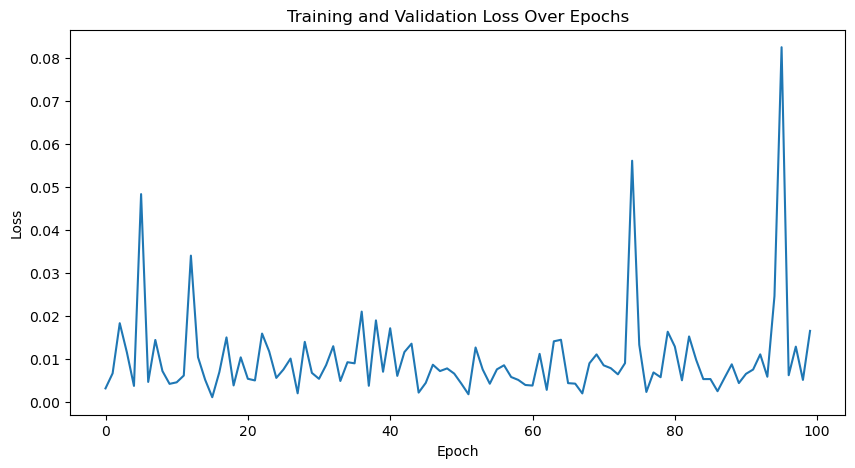

In [66]:
plt.figure(figsize=(10, 5))
plt.plot(range(num_epochs), losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.show()